In [0]:
!pip uninstall tensorflow

In [0]:
!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
import numpy as np

In [3]:
if tf.test.is_gpu_available():
    print("\nYour GPU is available to TensorFlow\n")
else:
    print("\nYour GPU is NOT available to TensorFlow\n")


Your GPU is available to TensorFlow



In [2]:
print(('Is your GPU available for use?\n{0}').format(
    'Yes, your GPU is available: True' if tf.test.is_gpu_available() == True else 'No, your GPU is NOT available: False'
))

Is your GPU available for use?
Yes, your GPU is available: True


In [0]:
# import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D, Conv2D
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
tf.__version__

'2.0.0'

In [5]:
# Load and prepare the MNIST dataset-
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Normalize and convert samples from integers to floating-point numbers-
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
# Cast to floating type-
X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [0]:
# Reshape training and testing data-
X_train = tf.reshape(X_train, shape=(X_train.shape[0], 28, 28, 1))
X_test = tf.reshape(X_test, shape = (X_test.shape[0], 28, 28, 1))

Desing an Autoencoder for MNIST dataset:

In [0]:
# Encoded size AFTER encoding the dataset-
encoding_dim = 32

In [0]:
def autoencoder(img_shape, encoded_size):
	'''
	Function to encode an image from
	'img_shape' (image dimensions) down to
	'encoded_size'

	Logically, the smaller the 'encoded_size' is,
	the more the image will compress, but the less
	features will be saved and the reproduced image
	will be that much more different from the original.
	'''

	# Encoder-
	encoder = Sequential()

	# a placeholder for the input with the size of the
	# input vector - img_shape-
	encoder.add(InputLayer(input_shape = img_shape))

	# 'Flatten' layer's job is to flatten the (28, 28, 1) matrix
	# into a 1D array (784) since the network architecture doesn't
	# accept 3D matrices-
	encoder.add(Flatten())

	# The last layer in the encoder is the Dense layer, which is the
	# actual neural network here. It tries to find the optimal parameters
	# that achieve the best output - in our case it's the encoding, and
	# we will set the output size of it (also the number of neurons in it)
	# to the 'encoded_size'-
	encoder.add(Dense(units = encoded_size))

	'''
	The decoder is also a sequential model. It accepts the input (the encoding)
	and tries to reconstruct it in the form of a row.
	Then, it stacks it into a 32x32x3 matrix through the Dense layer.
	The final Reshape layer will reshape it into an image.
	'''
	# Decoder-
	decoder = Sequential()
	decoder.add(InputLayer(input_shape = encoded_size))
	decoder.add(Dense(units = np.prod(img_shape)))

	# 'Reshape' layer will reshape it into an image-
	decoder.add(Reshape(img_shape))

	return encoder, decoder

In [11]:
IMG_SHAPE = X_train.shape[1:]

IMG_SHAPE

TensorShape([28, 28, 1])

In [0]:
# Get encoder & decoder of designed architecture-
encoder, decoder = autoencoder(IMG_SHAPE, encoding_dim)

In [0]:
# Input() is used to instantiate a Keras tensor-
inp = Input(shape = IMG_SHAPE)

encoded_inp = encoder(inp)
reconstructed_inp = decoder(encoded_inp)

In [15]:
encoded_inp.shape

TensorShape([None, 32])

In [16]:
reconstructed_inp.shape

TensorShape([None, 28, 28, 1])

In [0]:
# 'Model' groups layers into an object with training and inference features-
# Aliases: tf.keras.models.Model
autoencoder_nn = Model(inp, reconstructed_inp)

In [0]:
# Compile created model-
autoencoder_nn.compile(optimizer = 'adam', loss = 'mse')

In [19]:
# Train created model-
history = autoencoder_nn.fit(
	x = X_train, y = X_train,
	epochs = 20, validation_data = [X_test, X_test]
	)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0230 - val_loss: 0.0172
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0176 - val_loss: 0.0171
Epoch 3/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0175 - val_loss: 0.0170
Epoch 4/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0175 - val_loss: 0.0171
Epoch 5/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0175 - val_loss: 0.0171
Epoch 6/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0175 - val_loss: 0.0170
Epoch 7/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0175 - val_loss: 0.0170
Epoch 8/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0174 - val_loss: 0.0170
Epoch 9/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0174 - val

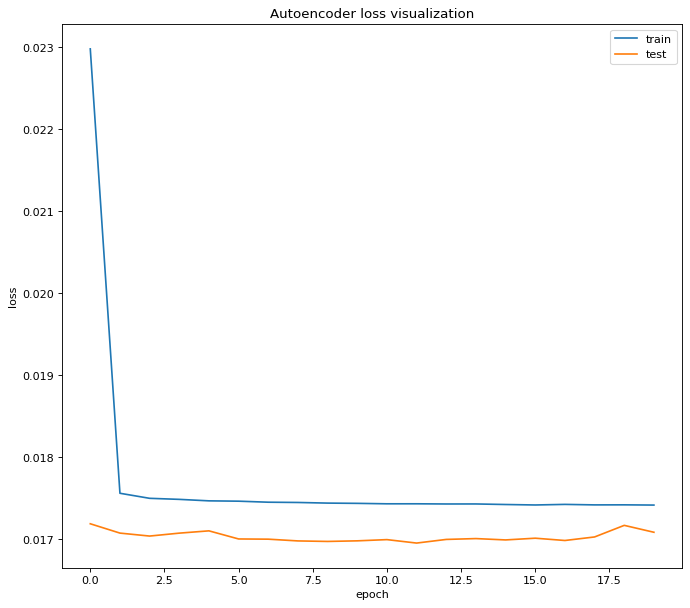

In [30]:
# We can visualize the loss over epochs to get an overview-
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Autoencoder loss visualization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

***Observations from visualization***

We can see that after the 2nd epoch, there's no significant progress
in loss.
Visualizing like this can help you get a better idea of how many epochs
is really enough to train your model. In this case, there's simply no need
to train it for 20 epochs, and most of the training is redundant.

This can also lead to over-fitting in the model, which will make it
perform poorly on new data outside the training and testing datasets.


In [0]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5
# autoencoder_nn.save("mnist_autoencoder.h5")

In [0]:
# Recreate the exact same model, including its weights and the optimizer-
# loaded_model = tf.keras.models.load_model('mnist_autoencoder.h5')

In [0]:
def visualize_images(img, encoder, decoder):
	'''
	Function to visualize original image, encoded
	image and reconstructed image using
	encoder and decoder
	'''
	encoded_img = encoder.predict(img[None])[0]
	reconstructed_img = decoder.predict(encoded_img[None])[0]

	plt.subplot(1, 3, 1)
	plt.title("Original")
	plt.imshow(tf.reshape(img, shape = (28, 28)), cmap = 'Greys')

	plt.subplot(1, 3, 2)
	plt.title("Encoded Image")
	plt.imshow(encoded_img.reshape(encoded_img.shape[-1] // 2, -1))

	plt.subplot(1, 3, 3)
	plt.title("Reconstructed Image")
	plt.imshow(tf.reshape(reconstructed_img, shape = (28, 28)), cmap = 'Greys')

	plt.show()

	return None

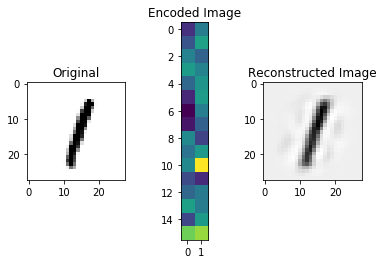

In [28]:
# Visualize a single image-
img = X_test[5]
visualize_images(img, encoder, decoder)

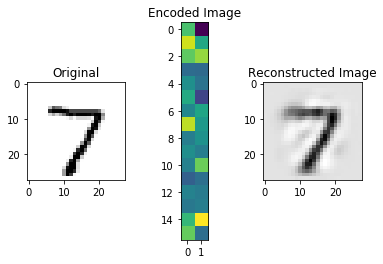

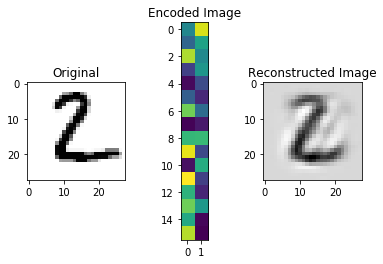

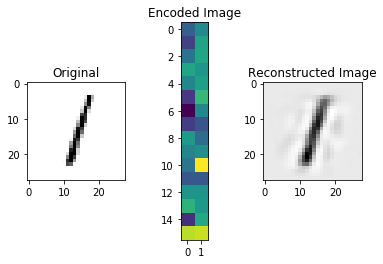

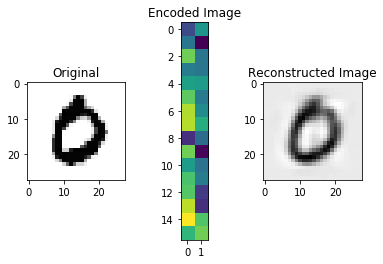

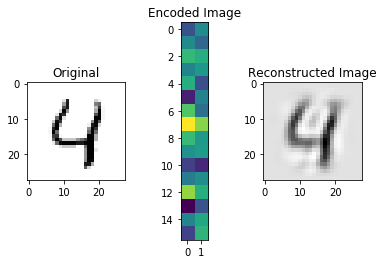

In [29]:
# Visualize 5 images-
for img_number in range(5):
	img = X_test[img_number]
	visualize_images(img, encoder, decoder)

You can see that the results are not that bad. The whole image (28 x 28 x 1) is encoded in the small vector of 32 seen in the middle, this isn't bad at all.

Through the compression from 784 dimensions to just 32 we lose data.

We design a new Autoencoder having more hidden layers in both encoding and decoding to see the result on encoding data further

In [0]:
def autoencoder2(img_shape, encoded_size):
	'''
	Function to encode an image from
	'img_shape' (image dimensions) down to
	'encoded_size'

	Logically, the smaller the 'encoded_size' is,
	the more the image will compress, but the less
	features will be saved and the reproduced image
	will be that much more different from the original.
	'''

	# Encoder-
	encoder = Sequential()

	encoder.add(InputLayer(input_shape = img_shape))
	encoder.add(Flatten())
	encoder.add(Dense(units = 128, activation = 'relu'))
	encoder.add(Dense(units = encoded_size, activation = 'relu'))

	# Decoder-
	decoder = Sequential()
	decoder.add(InputLayer(input_shape = encoded_size))
	decoder.add(Dense(units = 128, activation = 'relu'))
	decoder.add(Dense(units = np.prod(img_shape), activation = 'sigmoid'))

	# 'Reshape' layer will reshape it into an image-
	decoder.add(Reshape(img_shape))

	return encoder, decoder


In [0]:
encoding_dim = 28

In [0]:
# Get encoder & decoder of designed architecture-
encoder, decoder = autoencoder2(IMG_SHAPE, encoding_dim)

In [0]:
# Input() is used to instantiate a Keras tensor-
inp = Input(shape = IMG_SHAPE)

In [0]:
encoded_inp = encoder(inp)
reconstructed_inp = decoder(encoded_inp)

In [0]:
# 'Model' groups layers into an object with training and inference features-
# Aliases: tf.keras.models.Model
autoencoder_nn_2 = Model(inp, reconstructed_inp)

In [0]:
# Compile created model-
autoencoder_nn_2.compile(optimizer = 'adam', loss = 'mse')

In [49]:
# Train created model-
history2 = autoencoder_nn_2.fit(
	x = X_train, y = X_train,
	epochs = 20, validation_data = [X_test, X_test]
	)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0256 - val_loss: 0.0145
Epoch 2/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0137 - val_loss: 0.0123
Epoch 3/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0120 - val_loss: 0.0111
Epoch 4/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0110 - val_loss: 0.0102
Epoch 5/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0103 - val_loss: 0.0100
Epoch 6/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0099 - val_loss: 0.0095
Epoch 7/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0095 - val_loss: 0.0093
Epoch 8/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0092 - val_loss: 0.0090
Epoch 9/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0090 - val_

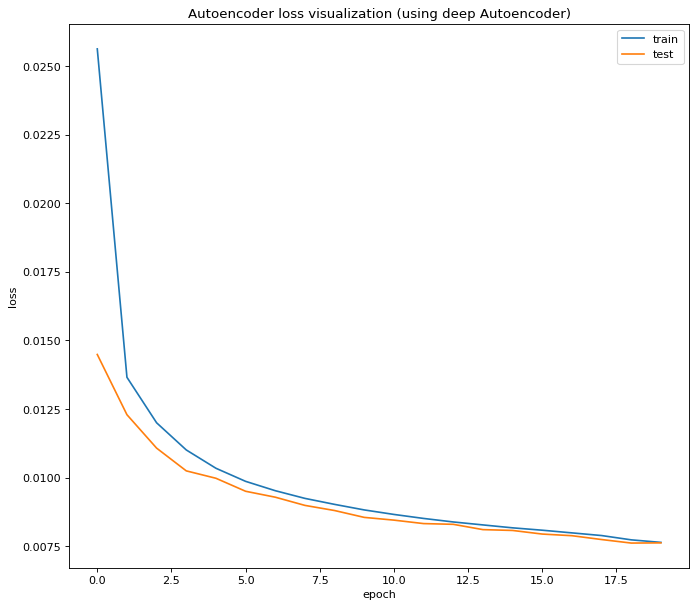

In [51]:
# We can visualize the loss over epochs to get an overview-
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('Autoencoder loss visualization (using deep Autoencoder)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Here, we can clearly see that using a deeper autoencoder has enhanced the compression of the data as the loss over both training and testing data keeps dropping throughout the training of 20 epochs.

Maybe, more epochs are needed.

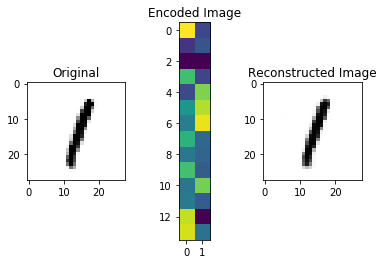

In [52]:
# Visualize a single image-
img = X_test[5]
visualize_images(img, encoder, decoder)

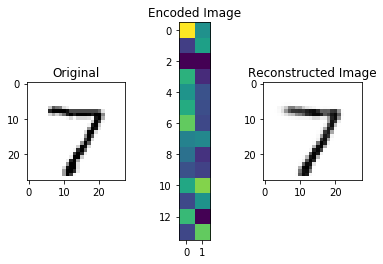

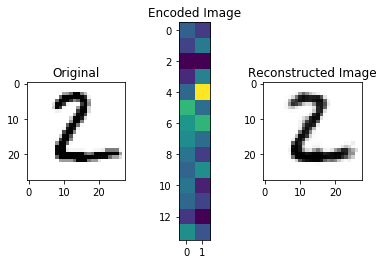

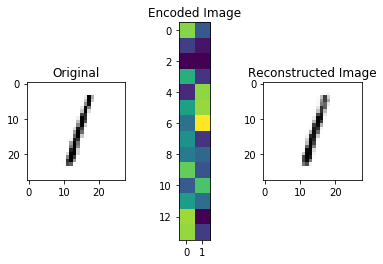

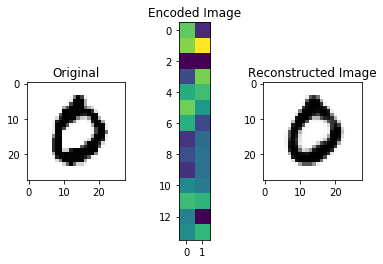

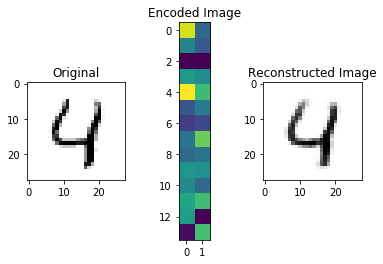

In [53]:
# Visualize 5 images-
for img_number in range(5):
	img = X_test[img_number]
	visualize_images(img, encoder, decoder)


**Observation**

Using a deep autoencoder improves the quality of the compressed image although in the second autoencoder, the image is reduced to a smaller encoding size of 28, whereas in the first autoencoder which is not deep, the encoded image is reduced down to 32.

The original image size is of (28 x 28 x 1) or 784 dimensions.

Therefore, probably, using a deep autoencoder with a smaller encoding size will produce a better job of encoding the dataset rather than using a shallow autoencoder with a larger encoding size.